In [64]:
import pandas as pd
import matplotlib.pyplot as plt;

In [65]:
df = pd.read_csv('dataset_malwares.csv');

In [66]:
# Total number of rows in the dataset
row_count = df.shape[0]
print("Total Rows in Dataset:", row_count)

Total Rows in Dataset: 19611


In [67]:
# Memory consumed by the entire DataFrame
memory_usage = df.memory_usage(deep=True).sum()
print("Memory Consumed by DataFrame:", memory_usage / (1024 ** 2), "Megabytes")

Memory Consumed by DataFrame: 13.276741027832031 Megabytes


In [68]:
# Get columns with unique values in each row
unique_columns = [col for col in df.columns if df[col].nunique() == len(df)]
print("Columns with Unique Values:\n", unique_columns)

Columns with Unique Values:
 ['Name']


In [69]:
all_columns_list = df.columns.tolist()
print("Count Columns Dataset:\n", len(all_columns_list))
print("All Columns in Dataset:\n", all_columns_list)

Count Columns Dataset:
 79
All Columns in Dataset:
 ['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr', 'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs', 'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine', 'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable', 'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion', 'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders', 'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware', 'SuspiciousImportFunctions', 'SuspiciousNameSection',

In [70]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

Class Distribution:
 Malware
1    14599
0     5012
Name: count, dtype: int64


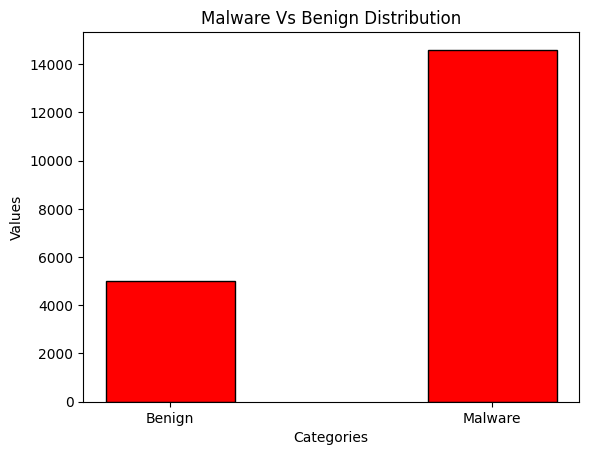

In [71]:
#Imbalance Check 
class_distribution = df['Malware'].value_counts()
print("Class Distribution:\n", class_distribution)


malware_count = df['Malware'].value_counts()[1];
Benign_count = df['Malware'].value_counts()[0];
x = ['Benign', 'Malware']
y = [Bengin_count, malware_count];

# Create the bar plot
plt.bar(x, y,color='red',width=0.4 , edgecolor='black', linewidth=1);

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Malware Vs Benign Distribution')

# Display the plot
plt.show()

In [72]:
# Function #2
#Missing Values Check 
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values[missing_values > 0])

Missing Values in Each Column:
 Series([], dtype: int64)


In [73]:

#Categorical columns can be of type object or category hence look for columnsn with this type
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:\n", categorical_columns)

Categorical Columns:
 Index(['Name'], dtype='object')


In [74]:
used_data = df.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1);

Class Distribution:
 Malware
0    14599
1    14599
Name: count, dtype: int64


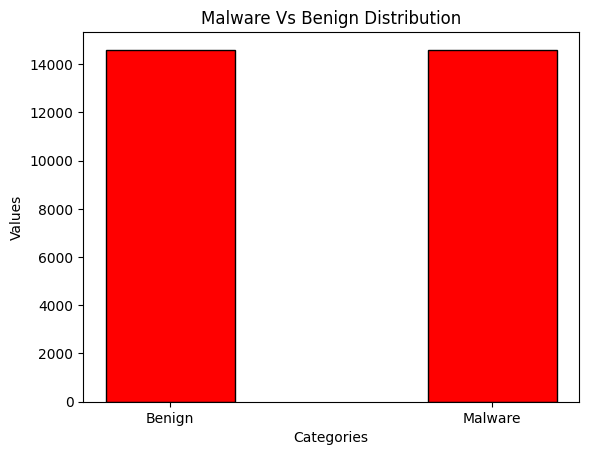

In [82]:
#Oversamlping
from sklearn.utils import resample
benign = df[df['Malware'] == 0]
malicious = df[df['Malware'] == 1]
# Oversample benign instances
benign_oversampled = resample(benign,replace=True,n_samples=len(malicious),random_state=42) 

# Combine oversampled benign with original malicious
df_oversampled = pd.concat([benign_oversampled, malicious])

class_distribution = df_oversampled['Malware'].value_counts()
print("Class Distribution:\n", class_distribution)

malware_count = class_distribution[1];
Benign_count = class_distribution[0];

x = ['Benign', 'Malware']
y = [Benign_count, malware_count];
# Create the bar plot
plt.bar(x, y,color='red',width=0.4 , edgecolor='black', linewidth=1);

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Malware Vs Benign Distribution')

plt.show()